## **A brief tutorial on the Code**

In [1]:
# Example usage of GNAR simulator and estimator
import numpy as np
import simulator
import estimator

import warnings
warnings.filterwarnings("ignore")

### *Section 1: GNAR Model*

$$
Y_{it} = \sum_{j=1, j\neq i}^N \beta_{g_i g_j} w_{ij} Y_{j,(t-1)} + \nu_{g_i} Y_{i,(t-1)} + z_i^\top \zeta_{g_i} + \varepsilon_{it}
$$

- <font color="red">1.1 Initialize the GNAR simulator with parameters</font>  

In [2]:
# Initialize the GNAR simulator
sim = simulator.GNAR_simulator()

In [3]:
# You can also set parameters for the simulator, here are the defaults:
sim = simulator.GNAR_simulator(N=100, T=300, G=3, seed=42,
                               CV_len=4, omit_eye=True, 
                               network_dummy=True, sigma=0.05)
#N = 100: Number of nodes.   
#T = 300: Number of time points    
#G = 3: Number of groups    
#seed = 42: Random seed for reproducibility       
#CV_len = 4: Length of the CV vector   
#omit_eye = True: Whether to omit the diagonal elements of the network  
#network_dummy = True: Whether to use a dummy network (0 or 1)
#sigma = 0.05: Standard deviation of the noise

In [4]:
# Next, set parameters for the GNAR model (beta, v, gamma)
beta, v, gamma, group = sim.generate_para()
print("Generated random parameters:")
print("Beta:", beta)
print("V:", v)
print("Gamma:", gamma)
print("Group:", group)

Network generated successfully.
CV generated successfully.
All Parameters generated successfully.
Generated random parameters:
Beta: [[0.1359409  0.0477824  0.45863716]
 [0.21577612 0.24207947 0.51297991]
 [0.21645018 0.03355324 0.18810224]]
V: [0.72903627 0.63197702 0.41844354]
Gamma: [[ 0.94419199  0.23511463  0.96283144 -0.32448803]
 [ 0.4060634  -0.55479273 -0.47759966  0.02380424]
 [-0.36076375 -0.66475687 -0.4742386  -0.92850321]]
Group: [2 1 0 2 2 1 2 1 1 2 2 1 2 1 2 1 2 2 0 0 1 0 0 1 2 2 1 0 2 0 1 0 1 1 2 1 2
 1 2 0 1 0 1 1 1 2 2 0 0 1 0 1 1 1 2 0 2 1 1 2 0 2 2 0 1 0 0 2 1 1 1 2 2 0
 0 2 0 2 0 1 2 0 2 2 0 0 2 2 0 1 1 1 2 1 2 0 1 0 1 1]


In [5]:
# You can also set specific parameters for the GNAR model
beta = np.array([[0.15,0.2,-0.1],[0.1,0.3,-0.2],[0.15,0.1,0.3]]).T
v = np.array([0.2,0.4,0.6])
beta, v, gamma, group = sim.generate_para(beta=beta, v=v)
# Make sure beta and v must be given together and compatible with the number of groups (G)
# Beta and v must satisfy the conditions for estimation consistency
print("Generated random parameters:")
print("Beta:", beta)
print("V:", v)
print("Gamma:", gamma)
print("Group:", group)

Network generated successfully.
CV generated successfully.
All Parameters generated successfully.
Generated random parameters:
Beta: [[ 0.15  0.1   0.15]
 [ 0.2   0.3   0.1 ]
 [-0.1  -0.2   0.3 ]]
V: [0.2 0.4 0.6]
Gamma: [[ 0.17596417  0.88394413 -0.65368817 -0.96052566]
 [-0.15507373  0.49683032  0.95020129 -0.89744186]
 [ 0.57192377 -0.26265185 -0.69253701 -0.61538969]]
Group: [0 1 1 0 2 1 1 2 2 2 2 1 1 2 2 2 1 0 1 2 0 0 2 0 0 2 1 0 2 1 1 0 2 1 1 1 1
 2 2 1 1 0 2 2 1 0 2 0 1 2 0 2 1 2 1 0 0 0 1 0 1 0 1 2 0 2 1 1 0 2 1 0 2 0
 2 1 1 1 2 2 0 1 2 1 2 2 2 0 1 2 2 0 1 2 1 0 0 1 1 1]


In [6]:
# Generate the data using the simulator
Y, CV, network = sim.generate_data()
print("Generated data shapes:")
print("Y shape:", Y.shape)
print("CV shape:", CV.shape)
print("Network shape:", network.shape)

Coefficient constructed successfully.


100%|██████████| 299/299 [00:00<00:00, 53105.95it/s]

Generated data shapes:
Y shape: (100, 300)
CV shape: (100, 4, 300)
Network shape: (100, 100, 300)


- <font color="red">1.2 Estimate the GNAR model using the generated data</font>

In [7]:
# Initialize the GNAR estimator with the generated data
est = estimator.GNAR_estimator(Y, CV, network, G=3, seed=42)
# The default seed is 42

In [8]:
# Fit the model using the estimator
res = est.fit(method='momentum')
# res = est.fit(method='networkeffect', max_iter=100, leave=True)

# Default method is 'networkeffect', default max_iter is 100
# Use 'leave=False' to omit the log information
# you can also use 'fixedeffect', 'momentum' and 'complete' as the method
# The method 'complete' is a test method and not recommended for real use
# For more details refer to the documentation

100%|██████████| 100/100 [00:01<00:00, 93.21it/s]


Epoch 0: 17 nodes updated


100%|██████████| 100/100 [00:01<00:00, 91.13it/s]


Epoch 1: 10 nodes updated


100%|██████████| 100/100 [00:01<00:00, 98.53it/s]


Epoch 2: 8 nodes updated


100%|██████████| 100/100 [00:01<00:00, 96.10it/s]


Epoch 3: 8 nodes updated


100%|██████████| 100/100 [00:00<00:00, 101.56it/s]


Epoch 4: 8 nodes updated


100%|██████████| 100/100 [00:00<00:00, 104.32it/s]


Epoch 5: 3 nodes updated


100%|██████████| 100/100 [00:00<00:00, 104.05it/s]


Epoch 6: 1 nodes updated


100%|██████████| 100/100 [00:01<00:00, 98.91it/s]


Epoch 7: 1 nodes updated


100%|██████████| 100/100 [00:00<00:00, 104.96it/s]

Epoch 8: 0 nodes updated


In [9]:
# Print the summary of the results
print('Group:', res.group)
res.summary()
# You can also access the estimated parameters
# print("Estimated beta:", res.beta)
# print("Estimated v:", res.v)
# etc. use dir(res) to see available attributes and methods

Group: [1 2 2 1 0 2 2 0 0 0 0 2 2 0 0 0 2 1 2 0 1 1 0 1 1 0 2 1 0 2 2 1 0 2 2 2 2
 0 0 2 2 1 0 0 2 1 0 1 2 0 1 0 2 0 2 1 1 1 2 1 2 1 2 0 1 0 2 2 1 0 2 1 0 1
 0 2 2 2 0 0 1 2 0 2 0 0 0 1 2 0 0 1 2 0 2 1 1 2 2 2]
GNAR Model Results:
N of Groups: 3    , Nodes: 100  , Time Periods: 300  , Covariates: 4    
=========================== Group 0 =============================
Nodes_n: 35   , Obs_n: 10465, R2: 0.9968    , R2_adj: 0.9968    
Var            Coef           Robust SE      t-stat         p-value        
beta_g0g0      0.3050         0.0036         83.8781        0.0000         
beta_g0g1      -0.1018        0.0101         -10.0491       0.0000         
beta_g0g2      -0.1974        0.0107         -18.4868       0.0000         
v_g0           0.5990         0.0030         199.7346       0.0000         
gamma_g0_0     0.5990         0.0030         199.7346       0.0000         
gamma_g0_1     0.5722         0.0047         121.6448       0.0000         
gamma_g0_2     -0.2622        0.0

### *Section 2: Time-Varying GNAR Model*

$$
Y_{it} = \sum_{j=1, j\neq i}^N \beta_{g_i g_j} w_{ij}(t) Y_{j,(t-1)} + \nu_{g_i} Y_{i,(t-1)} + z_{it}^\top \zeta_{g_i} + \varepsilon_{it}
$$

In [10]:
# generate time-varying data
sim = simulator.GNAR_simulator(network_time_varying=True, CV_time_varying=True)
# You can also just set one time-varying parameter
beta = np.array([[0.15,0.2,-0.1],[0.1,0.3,-0.2],[0.15,0.1,0.3]]).T
v = np.array([0.2,0.4,0.6])
beta, v, gamma, group = sim.generate_para(beta=beta, v=v)
Y, CV, network = sim.generate_data()

Network generated successfully.
CV generated successfully.
All Parameters generated successfully.
Coefficient constructed successfully.


100%|██████████| 299/299 [00:00<00:00, 53756.99it/s]


In [11]:
# fit the model using the estimator
est = estimator.GNAR_estimator(Y, CV, network, G=3, seed=42)
# use the time_varying parameter to fit the model
res = est.fit(method='networkeffect', time_varying=True)
res.summary()

100%|██████████| 100/100 [00:01<00:00, 97.28it/s]

Epoch 0: 0 nodes updated
GNAR Model Results:
N of Groups: 3    , Nodes: 100  , Time Periods: 300  , Covariates: 4    
=========================== Group 0 =============================
Nodes_n: 29   , Obs_n: 8671 , R2: 0.9768    , R2_adj: 0.9768    
Var            Coef           Robust SE      t-stat         p-value        
beta_g0g0      0.3196         0.0195         16.3778        0.0000         
beta_g0g1      0.0955         0.0051         18.6240        0.0000         
beta_g0g2      0.1621         0.0269         6.0288         0.0000         
v_g0           0.3987         0.0016         243.6878       0.0000         
gamma_g0_0     0.3987         0.0016         243.6878       0.0000         
gamma_g0_1     0.7872         0.0018         432.9666       0.0000         
gamma_g0_2     -0.6403        0.0018         -347.1494      0.0000         
gamma_g0_3     -0.1025        0.0019         -55.2243       0.0000         
=========================== Group 1 =============================
N

### *Section 3: Normal Regression with Grouped Network Effect*

$$
Y_{it} = \sum_{j=1, j\neq i}^N \beta_{g_i g_j} w_{ij}(t) X_{j,t} + \nu_{g_i} Y_{i,t} + z_{it}^\top \zeta_{g_i} + \varepsilon_{it}
$$

In [12]:
# generate Normal regression data
sim = simulator.GNAR_simulator(CV_time_varying=True, autoregression=False)
beta = np.array([[0.15,0.2,-0.1],[0.1,0.3,-0.2],[0.15,0.1,0.3]]).T
v = np.array([0.2,0.4,0.6])
beta, v, gamma, group = sim.generate_para(beta=beta, v=v)
# Generate the data using the simulator, Note that X is also generated
Y, X, CV, network = sim.generate_data()
print('X shape:', X.shape)

Network generated successfully.
CV generated successfully.
All Parameters generated successfully.
Coefficient constructed successfully.
X shape: (100, 300)


In [13]:
# fit the model using the estimator
est = estimator.GNAR_estimator(Y, CV, network, G=3, seed=42, X=X)
# If the X is provided, the normal regression model will be fitted automatically

res = est.fit(method='momentum', time_varying=True)
res.summary()

100%|██████████| 100/100 [00:00<00:00, 100.68it/s]


Epoch 0: 32 nodes updated


100%|██████████| 100/100 [00:01<00:00, 99.84it/s]


Epoch 1: 2 nodes updated


100%|██████████| 100/100 [00:01<00:00, 99.79it/s]

Epoch 2: 0 nodes updated
GNAR Model Results:
N of Groups: 3    , Nodes: 100  , Time Periods: 300  , Covariates: 4    
=========================== Group 0 =============================
Nodes_n: 33   , Obs_n: 9900 , R2: 0.9667    , R2_adj: 0.9666    
Var            Coef           Robust SE      t-stat         p-value        
beta_g0g0      0.0595         0.1282         0.4642         0.6425         
beta_g0g1      0.3255         0.1159         2.8083         0.0050         
beta_g0g2      0.1380         0.1086         1.2709         0.2038         
v_g0           0.4161         0.0173         24.0481        0.0000         
gamma_g0_0     0.4161         0.0173         24.0481        0.0000         
gamma_g0_1     -0.5916        0.0017         -342.8198      0.0000         
gamma_g0_2     -0.5169        0.0017         -302.0161      0.0000         
gamma_g0_3     -0.4890        0.0017         -286.5985      0.0000         
=========================== Group 1 =============================
N

### *Section 4: Use GIC to select the number of groups*

$$
\mathbb{GIC}_{\lambda_{NT}}(G) = \log \left\{\mathbf{Q}\left(\widehat{\boldsymbol{\theta}}^{(G)}, \widehat{\boldsymbol{\beta}}^{(G)}, \widehat{\mathbf{G}}^{(G)}\right) \right\} + \lambda_{NT} G
$$

$$
\lambda_{NT} = \dfrac{N^{1/10}T^{-1/2}}{2\min\{10,n_{90}\}}
$$

In [14]:
# generate data with G = 3
sim = simulator.GNAR_simulator(N=100, T=200, G=3, seed=42, CV_time_varying=True, 
                            sigma=0.1)
beta = np.array([[0.15,0.2,-0.1],[0.1,0.3,-0.2],[0.15,0.1,0.3]]).T
v = np.array([0.2,0.4,0.6])
beta, v, gamma, group = sim.generate_para(beta=beta, v=v)
Y, CV, network = sim.generate_data()

Network generated successfully.
CV generated successfully.
All Parameters generated successfully.
Coefficient constructed successfully.


100%|██████████| 199/199 [00:00<00:00, 77853.42it/s]


In [15]:
# If we don't know the number of groups, we can use GIC to select it
est = estimator.GNAR_estimator(Y, CV, network, G=4, seed=42)
res_GIC = est.fit_GIC(method='fixedeffect', time_varying=True)
# You can also specify the  max_G and max_iter
# res_GIC = est.fit_GIC(method='fixedeffect', max_G=8, max_iter=100, time_varying=True)

G=1, GIC=-1.7875, loss=0.1591, lambda_NT=0.0510


G=2, GIC=-2.7779, loss=0.0561, lambda_NT=0.0510


G=3, GIC=-4.4471, loss=0.0101, lambda_NT=0.0510


G=4, GIC=-4.3985, loss=0.0100, lambda_NT=0.0510


G=5, GIC=-4.3500, loss=0.0100, lambda_NT=0.0510


G=6, GIC=-4.3017, loss=0.0100, lambda_NT=0.0510


G=7, GIC=-4.2519, loss=0.0100, lambda_NT=0.0510


G=8, GIC=-4.2012, loss=0.0100, lambda_NT=0.0510
Best G=3, GIC=-4.4471, back to G=3


In [16]:
res_GIC.summary()
# res_GIC.res is the dictionary of results for each G
# res_GIC.GIC is the GIC values for each G
# etc. Use dir(res_GIC) to see available attributes and methods

 GIC: best G = 3
GNAR Model Results:
N of Groups: 3    , Nodes: 100  , Time Periods: 200  , Covariates: 4    
=========================== Group 0 =============================
Nodes_n: 31   , Obs_n: 6169 , R2: 0.9456    , R2_adj: 0.9455    
Var            Coef           Robust SE      t-stat         p-value        
beta_g0g0      0.1623         0.0186         8.7421         0.0000         
beta_g0g1      0.1512         0.0054         27.8072        0.0000         
beta_g0g2      0.1216         0.0196         6.2124         0.0000         
v_g0           0.2012         0.0029         69.3195        0.0000         
gamma_g0_0     0.2012         0.0029         69.3195        0.0000         
gamma_g0_1     0.9537         0.0043         220.6144       0.0000         
gamma_g0_2     0.2342         0.0044         53.5348        0.0000         
gamma_g0_3     0.9617         0.0043         222.9454       0.0000         
=========================== Group 1 =============================
Nodes_n: 

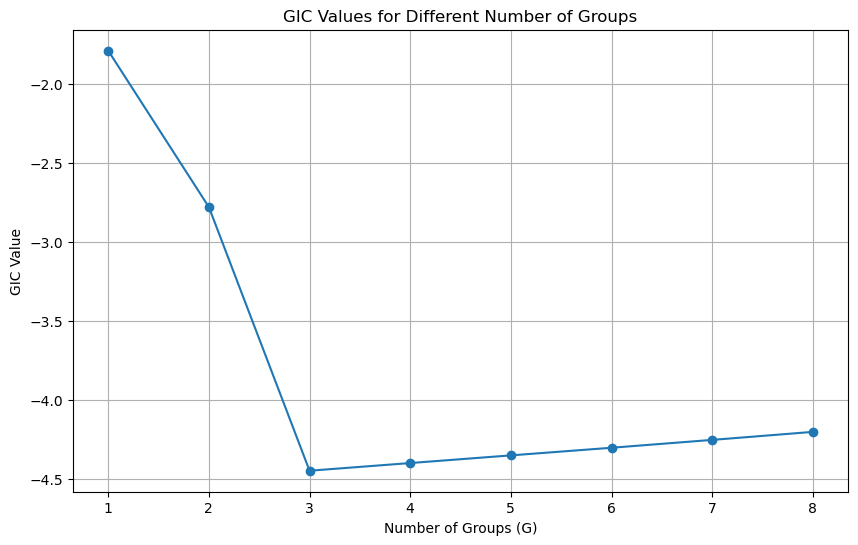

In [17]:
# Plot the GIC results
res_GIC.plot()
# res_GIC.plot(figsize=(10, 6), dpi=100)